## Introduction

This project will be a visual exploratory analysis of Life Expectancy and GDP data.

I will use charts to analyse whether there are any patterns when it comes to the Life Expectancy of a nation and the reported GDP of that nation.

Initial questions include:

    * Has life expectancy increased over time in the six nations?
    * Has GDP increased over time in the six nations?
    * Is there a correlation between GDP and life expectancy of a country?
    * What is the average life expectancy in these nations?
    * What is the distribution of that life expectancy?

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import data

In [2]:
data = pd.read_csv("all_data.csv")

### 3. Inspect data

In [3]:
#Get the first 5 rows of the dataframe
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
#Get the columns of the dataframe
data.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

In [5]:
#Get the datatypes contained in the dataframe
data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [6]:
#Get the number of different countries in the data
data.Country.nunique()

6

In [7]:
#Get the unique couuntries
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [8]:
#Rename United States of America as USA for readability on charts
data = data.set_index("Country")
data.rename(index = {"United States of America" : "USA"}, inplace = True)
data = data.reset_index()
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

In [9]:
#Get the unique years
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

### 4. Plot charts to explore Life Expectancy and GDP by year for each country

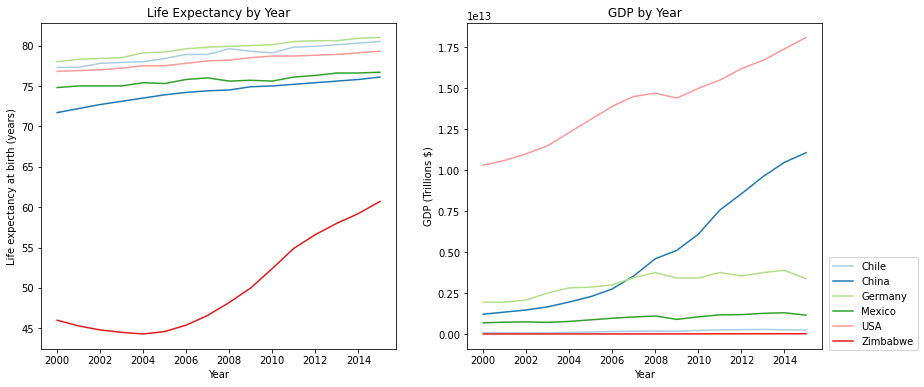

In [10]:
sns.set_palette("Paired")
fig = plt.subplots(1, 2, figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data = data, x = "Year", y = "Life expectancy at birth (years)", hue = "Country", legend = False)
plt.title("Life Expectancy by Year")
plt.subplot(1, 2, 2)
sns.lineplot(data = data, x = "Year", y = "GDP", hue = "Country")
plt.title("GDP by Year")
plt.ylabel("GDP (Trillions $)")
plt.legend(bbox_to_anchor=(1.02, 0.28), loc='upper left', borderaxespad=0)
plt.show()

### First impressions of the Life Expectancy data:

    * All countries life expectancy is generally trending up between 2000 and 2015
    * Chile has a surprisingly high Life Expectancy, similar to the United States and Germany.
    * Zimbabwe's Life Expectancy declined initially before rapidly rising from 2004
    


### First impressions of the GDP data:

    * United states' GDP dwarfs all other nations
    * China is showing exponential growth and is second only to the United States
    * All countries appear to be generally increasing their GDP over time
    * Zimbabwe's GDP is too low to measure on this scale
    


## 5. Plot line plots for each country to examine the trend of their Life expectancy vs GDP 

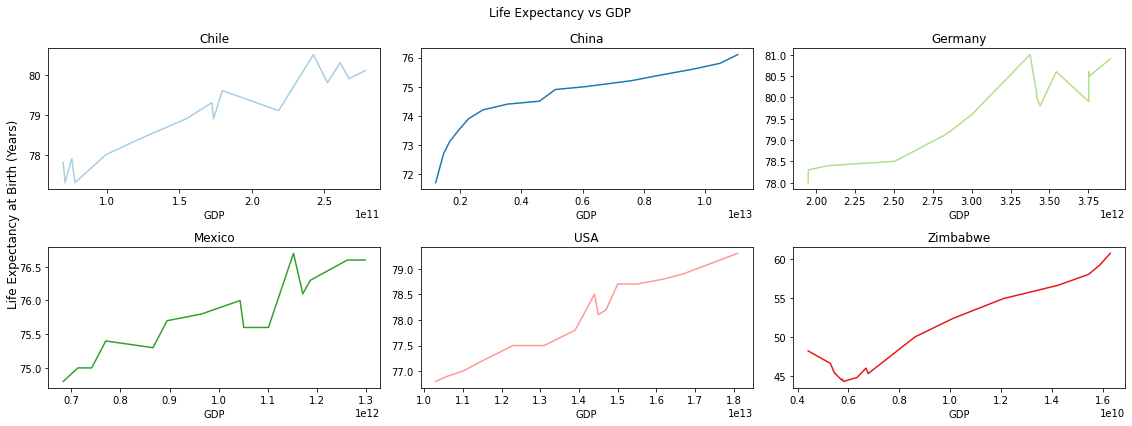

In [11]:
fig, axs = plt.subplots(2, 3, figsize = (16, 6), tight_layout = True)
fig.suptitle("Life Expectancy vs GDP")
fig.supylabel("Life Expectancy at Birth (Years)")
i = 1


#Make a colour dict to keep all of the same colour as previous chart
color_dict = {
    1 : '#a6cee3',
    2 : '#1f78b4',
    3 : '#b2df8a',
    4 : '#33a02c',
    5 : '#fb9a99',
    6 : '#e31a1c'
}

c = 1

#Loop through countries in data and plot Life Expectancy vs GDP to see them all on a relevant scale
for n in data.Country.unique():
    plt.subplot(2, 3, i)
    sns.lineplot(x = data[data.Country == n]["GDP"], y = data[data.Country == n]["Life expectancy at birth (years)"], color = color_dict[c])
    plt.title(f"{n}")
    plt.ylabel("")
    i += 1
    c += 1
plt.show() 


This view is excellent for viewing each individual country but it does not clearly identify Chile as a country of interest, with such a high Life Expectancy for their GDP.

All countries have a positive correleation between life expectancy and their GDP.

Chile is an outlier with a high life expectancy with a relatively low GDP compared to Germany and USA but life expectancy still increases with an increase in GDP.

Now to check if a linear regression model is appropriate.

## 6. Determine if a linear regression model will fit for a country's life expectancy vs GDP

Plot the residuals to see if there is a pattern or randomness which will determine the efficacy of a liner regression model for each country.

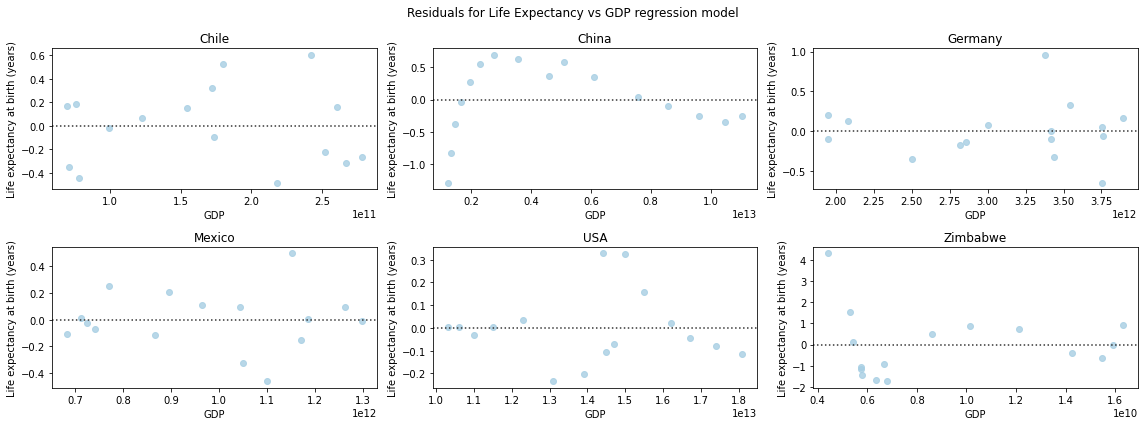

In [12]:
fig, axs = plt.subplots(2, 3, figsize = (16, 6), tight_layout = True)
fig.suptitle("Residuals for Life Expectancy vs GDP regression model")
i = 1
for n in data.Country.unique():
    plt.subplot(2, 3, i)
    sns.residplot(data = data[data.Country == n], x = "GDP", y = "Life expectancy at birth (years)")
    plt.title(f"{n}")
    i += 1

plt.show()

The data from China and Zimbabwe especially do not suit for linear regression very well.

After seeing these results, I think this view would be better to examine the mean life expectancy over those years vs GDP for comparison.

## 7. Find the mean life expectancy and GDP for each country for these years

In [13]:
#Make a mean life expectancy dataframe
mean_LE = data[["Country", "Life expectancy at birth (years)"]].groupby("Country").mean("Life expectancy at birth (years)")
#mean_LE

In [14]:
#Make a mean GDP dataframe
mean_GDP = data[["Country", "GDP"]].groupby("Country").mean("GDP")
#mean_GDP

In [15]:
#Merge dataframes and sort by "Life Expectancy" so the graph appears to be ascending
mean_data = mean_LE.join(mean_GDP)
mean_data = mean_data.sort_values(by = "Life expectancy at birth (years)").reset_index()
mean_data

,Country,Life expectancy at birth (years),GDP
0,Zimbabwe,50.09375,9.062580e+09
1,China,74.26250,4.957714e+12
2,Mexico,75.71875,9.766506e+11
3,USA,78.06250,1.407500e+13
4,Chile,78.94375,1.697888e+11
5,Germany,79.65625,3.094776e+12


## 8. Plot these mean values as side-by-side bar graphs to compare Life Expectancy vs GDP

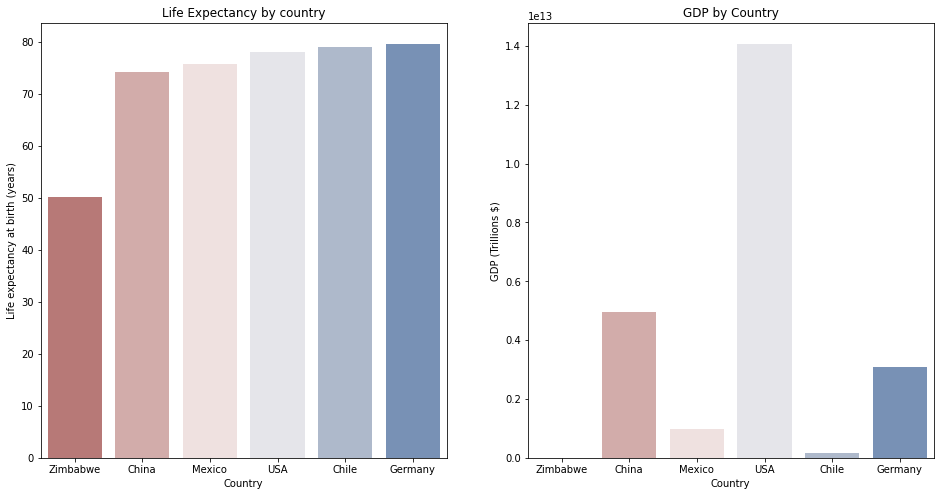

In [16]:
#Plot a bar chart to see mean Life expectancy and GDP for each country
fig = plt.subplots(1, 2, figsize = (16, 8))
sns.set_palette("vlag_r")

plt.subplot(1, 2, 1)
sns.barplot(data = mean_data, x = "Country", y = "Life expectancy at birth (years)")
plt.title("Life Expectancy by country")

plt.subplot(1, 2, 2)
sns.barplot(data = mean_data, x = "Country", y = "GDP")
plt.title("GDP by Country")
plt.ylabel("GDP (Trillions $)")

plt.show()

These mean values for Life expectancy between 2000 and 2015 interestingly show that the countries with the highest life expectancy didnt have the highest GDP.

Mean values dont tell the whole story though, so I will plot the same data in boxplot form to see inside the data a bit more. This will be useful as many of the countries' GDPs have changed rapidly in these years, potentially skewing the data.

## 9. Compare boxplots for Life Expectancy and GDP

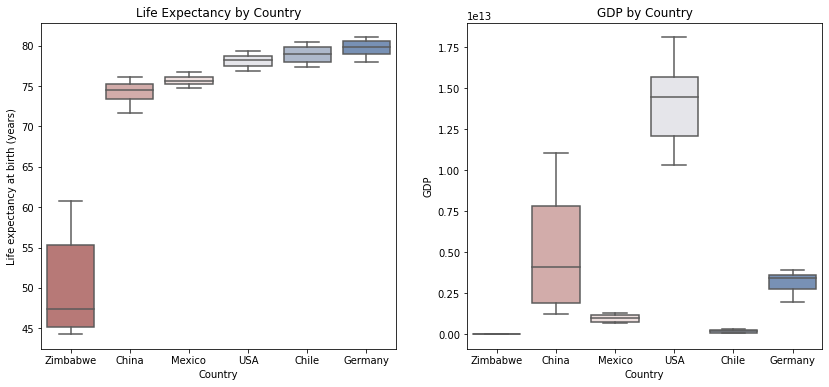

In [17]:
fig = plt.subplots(1, 2, figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data = data, x = "Country", y = "Life expectancy at birth (years)", order = mean_data.Country)
plt.title("Life Expectancy by Country")

plt.subplot(1, 2, 2)
sns.boxplot(data = data, x = "Country", y = "GDP", order = mean_data.Country)
plt.title("GDP by Country")

plt.show()

## 10. Make histogram showing the distribution of Life Expectancy in these countries

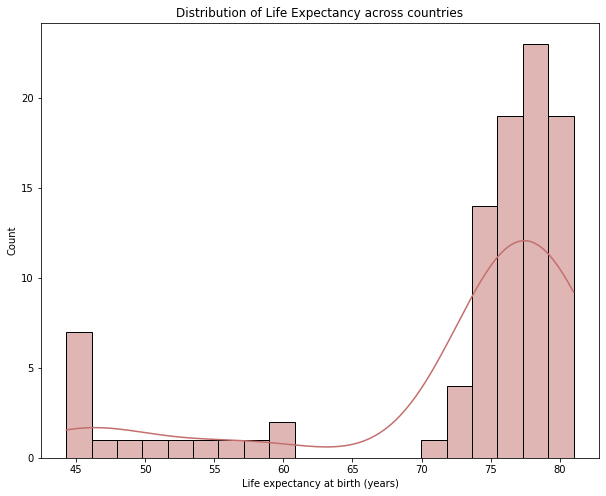

In [18]:
#Use sns FacetGrid to make histograms of life expectancy
plt.figure(figsize = (10, 8))
sns.histplot(data = data, x = "Life expectancy at birth (years)", bins = 20, kde = True)
plt.title("Distribution of Life Expectancy across countries")
plt.show()

## Conclusions



    * Has life expectancy increased over time in the six nations?
       * Life expectancy increased as time progressed between years 2000 and 2015.

    * Has GDP increased over time in the six nations?
       * The general trend for all countries was also an increase in GDP over time.

    * Is there a correlation between GDP and life expectancy of a country?
       *  As both life expectancy and GDP generally increased over time
          in each country, we can say there is a positive correlation between
          life expectancy and GDP.
          
       *  Surprisingly however the richest countries did not have the longest life expectancy, 
          raising more questions.
        
    * What is the average life expectancy in these nations?
        Most countries' life expectancies were between 70 and 80 years, Zimbabwe being the outlier 
        with a mean life expectancy of around 50.
        
    * What is the distribution of that life expectancy?
        *  The distribution is left skewed with the vast majority of oservations between 70 and 80 
        years old at the far right of the observations.


### Interesting findings

The countries with the longest life expectancy did not have the highest GDP. Notably Chile has the second highest life expectancy and the second lowest GDP. Germany has the highest life expectancy and only the 3rd highest GDP.

USA and China are interesting cases. With first and second highest GDP respectively. USA has the 3rd highest life expectancy and China has the second lowest, only ahead of Zimbabwe.

If life expectancy and GDP were truly correlated as it is in individual countries' growth, then why isn't the "richest" country the one with the longest life expectancy?

This sugguests that there are other factors determining life expectancy other than GDP, such as lifestyle and diet for example. Or even how the countries spend their resources on healthcare or other things that benefit the population's life expectancy.